In [41]:
import torch
from torch import nn # nn = neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

In [42]:
# Parameters "known" are created
# build a model that estimates thse numbers
import torch

weight = 0.7
bias = 0.3


#create numbers
start = 0
end = 1

#gap of a step
step = 0.02

# X is INPUT a matrix or a tensor, capitol . Lowercase is a vector
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze adds extra dim

# IDEAL OUTPUT y, this case a linear regression formula
y = weight * X + bias

print(f"Input numbers:\n {X[:10]}\n Output numbers:\n {y[:10]} \n{len(X), len(y)}")

Input numbers:
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
 Output numbers:
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 
(50, 50)


In [43]:
# We split the data into training and test sets
# One of the most important concepts in machine learning in general
train_split = int(0.8 * len(X))

# creating train and test sets, notice index notation
# getting everything before & after train_split (40)
X_train, y_train = X[:train_split], y[:train_split] # 0-40 = 40
X_test, y_test = X[train_split:], y[train_split:] # 40-50 = 10

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [44]:
# Numerical representation of our test and train data for features and labels
X_train, X_test, y_train, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
        

In [45]:
# Making a function to represent the train and test data more accurately

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

  """Plotting training & test data, along with comparing predictions. """
  plt.figure(figsize=(10, 7))

  #train data in blue
  plt.scatter(train_data, train_labels, c = 'orange', s=4, label= 'Training Data')

  #test data in green
  plt.scatter(test_data, test_labels, c = 'purple', s=4, label= 'Testing Data')

  # Checking if predictions exist
  if predictions is not None:

    #if they do plot the predictions, compared to test labels
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend A legend in an axes is an area that describes the elements of a graph.
  plt.legend(prop={"size" : 14});

' No predictions yet so no red dots\n    Make a model that learns the pattern of the orange dots\n    If we fit the model, the X values of the purple dots can predict the Y values of the purple dots\n    Pass model X test to predict Y test\n    Orange dots are input, Purple are ideal outputs\n    A perfect model would have red dots over the purple dots'

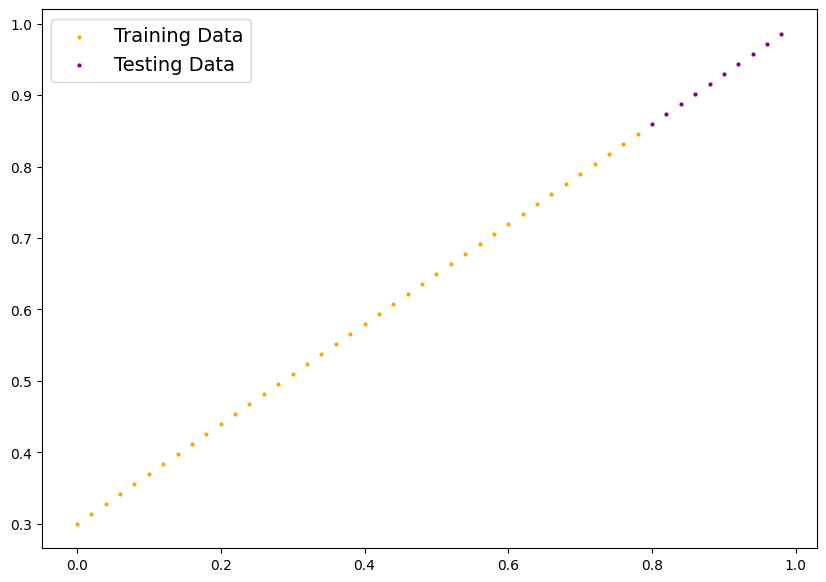

In [46]:
plot_predictions() # No red dots because there are no predictions

""" Our dataset, training data in orage, testing data in purple, and predictions in red """
""" No predictions yet so no red dots
    Make a model that learns the pattern of the orange dots
    If we fit the model, the X values of the purple dots can predict the Y values of the purple dots
    Pass model X test to predict Y test
    Orange dots are input, Purple are ideal outputs
    A perfect model would have red dots over the purple dots"""

Building a Model

In [47]:
""" We created a relationship between X and y, the weight and bias through
the linear regression formula is y = weight * X + bias
gradient (weight) and bias (gradient)


Using linear regression Y = a + b*X   a=weight, b=bias
We need to create a mdoel that has a parameter for a and a parameter for b
"""

' We created a relationship between X and y, the weight and bias through\nthe linear regression formula is y = weight * X + bias\ngradient (weight) and bias (gradient)\n\n\nUsing linear regression Y = a + b*X   a=weight, b=bias\nWe need to create a mdoel that has a parameter for a and a parameter for b\n'

In [48]:
from torch import nn

# creating a linear reg model class, using nn.Module chech toch.nn.Module for more info
class LinearRegressionModel(nn.Module): # inherit from nn.Module, most things in PyTorch inherit from this.
 def __init__(self): # constructor taking self as a parameter
    super().__init__()

    #creating parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Method to deifne computation in the model
  #parameter x is expected to be a torch.Tensor and return a torch.Tensor
 def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias

    """ The model starts with random parameters both 'self' parameters, then it looks at the data training samples in this case
        and then it computers and updates those random numbers to represent the pattern in the data graphed.
        Random values from weight and bias will be put through the foward function.
        It takes the weight and bias and it runs through the 'forward' calculation which is the same formula that we used
        to create our data, this to represent as close as possible, if not perfect the known parameters (0.7 and 0.3)
        Utilizing gradient descent algorithm """


In [49]:
 ## Model building essentials from PyTorch
 '''
 -torch.nn = contains buildings for computational graphs (neural netword could be considered a computational graph)
 -torh.nn.Parameter = What paremeters should be tried on and learned by our models (commonly a PyTorch layer form torch.nn will set these for us)
 -torch.nn.Module = Base class for entirety of neural network modules in PyTorch (if subclassedm should overwrite forward)
 -torch.optim = You can find optimizers here. they are an aid with gradient descent algorithms.
 -def forward() = Defines computation in the model, all nn.Module subclasses require you to overwrite this method
 -torch.utils.data.Dataset = Represents a map between key & sample (label &features) pairs of your data. (e.g. images & associataed labels)
 -torch.utils.data.DataLoader = Creates python iterable over a torch dataset(allowing yo iterate over your data)

 review PyTorch cheaet sheet for more info
 '''

'\n-torch.nn = contains buildings for computational graphs (neural netword could be considered a computational graph)\n-torh.nn.Parameter = What paremeters should be tried on and learned by our models (commonly a PyTorch layer form torch.nn will set these for us)\n-torch.nn.Module = Base class for entirety of neural network modules in PyTorch (if subclassedm should overwrite forward)\n-torch.optim = You can find optimizers here. they are an aid with gradient descent algorithms.\n-def forward() = Defines computation in the model, all nn.Module subclasses require you to overwrite this method\n-torch.utils.data.Dataset = Represents a map between key & sample (label &features) pairs of your data. (e.g. images & associataed labels)\n-torch.utils.data.DataLoader = Creates python iterable over a torch dataset(allowing yo iterate over your data)\n\nreview PyTorch cheaet sheet for more info\n'

In [50]:
# CHECKING CONTENTS of our recently created model
'''
This is done by using .parameters() method
'''

'\nThis is done by using .parameters() method\n'

In [51]:
# Creating a random seed because the parameters are cerated with random values
# If there's no random seed, we'd get different values every time
# We need a manual seed in this case
torch.manual_seed(42)

#Creating an instance of the linear regression model class (this is a subclass of nn.Module)
first_model = LinearRegressionModel()

# checking parameters of model
print(f'Without a list {first_model.parameters()}')
print(f'With a list \n {list(first_model.parameters())}')

Without a list <generator object Module.parameters at 0x7d3fd1658cf0>
With a list 
 [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [52]:
# Listing named parameters, we can see the random weight & bias here
first_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [53]:
# We need to take previous random weight & bias to the set ones, only in this case
# usually there are no set weight&bias values
weight, bias

(0.7, 0.3)

In [54]:
# Prediction making

'''
We will see how well it predicts 'y_test' based on 'X_test'
Passing data through the model (using the forward method), will return a prediction
'''

with torch.inference_mode():
  y_preds = first_model(X_test)
#passing x test data through the instance model
 #it will take x_test values as input and will return y_test values as result
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [55]:
#
# Same operation with no inference mode
#y_preds = first_model(X_test)
#y_preds

In [56]:
# comparing predictions with actual results
y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

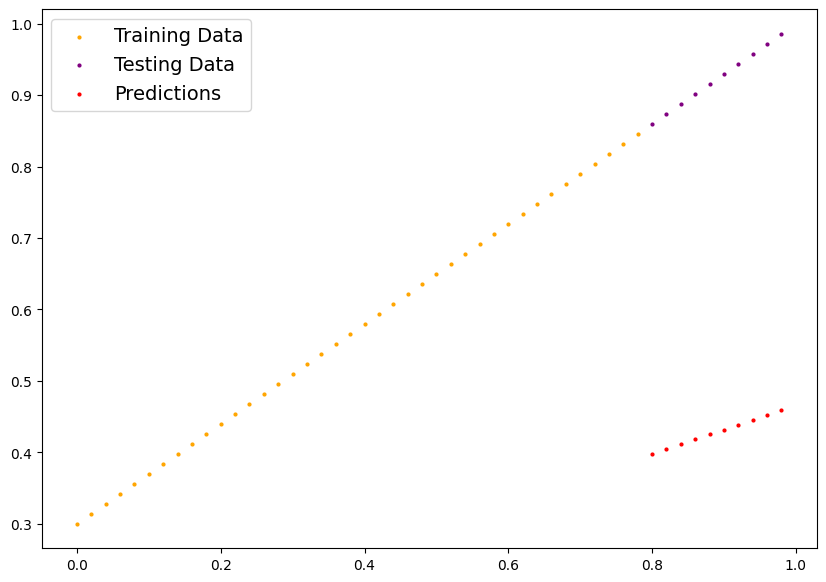

In [57]:
# plotting the predictions
plot_predictions(predictions=y_preds)

# 3. Training the model
## The idea of training is for the model to go from some unknown parameters (that could be random) to actively known parameters.

## Go from a poor representation of data (y_test & y_preds graphed) to a better one

## Loss/Cost/Criterion functions can measure how poor or how wrong your model predictions are.

## A loss fucntion is a function that measures how wrong your model's predictions are to the ideal outputs, the lower the better

## An optimizer function takes the loss of a model and adjusts the model parameters e.g. weight & bias to IMPROVE the loss function.

## For PyTorch. we need:
* Training loop
* Testing loop

In [58]:
list(first_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [59]:
#checking our models parameters(value that the model sets on its own)
first_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
# setting up a loss function (evaluates how wrong our model is)
fn_loss = nn.L1Loss()

# setting up an optimizer (stochastic gradient descent, adjusts our model parameters)
fn_optim = torch.optim.SGD(params=first_model.parameters(), lr=0.01) #model parameters & learning rate as params
# learning rate is an important hyperparameter (value that DS/ML engineer sets)
# taking baby steps in the hundreds .01 to have a smaller change in the parameter
# larger learning rate results in larger changes

In [61]:
# Our major goal is to reduce the MAE of our workflow

##Building a training loop & testing loop
#For this we need:
* To loop through the data
* We need Foward pass /  Forward propagation - makes predictions in data(involves data moving through our model's functions such as foward)
* We must calculate loss (comparing forward pass predictions to GROUND truth labels)
* We will optimize the zero grad
* We will loss backward through BACKPROPAGATION - move backwards the network, calculations for each of the parameters of the model with respect to the loss
* We will do Optimizer Step GRADIENT DESCENT, this will adjust model parameters to try and improve the loss

#Our models utilize math to go from random parameters to better parameters

In [62]:
# IN ORDER TO SUCCEED!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# The goal is to move the random weight and bias ton the original weight and bias values
# FOR EXAMPLE after the first epoch, printing the loss & the weights&bias we get:
# Loss: 0.301360......
# weights = 0.3406 bias = 0.1388

# In order to be succeed we need to match these random weight&bias & diminish loss:
# Loss should be close to 0
# To the original ones:
# weight = 0.7 bias = 0.3

# NOTE IN REAL PROBLEMS WE DONT REALLY KNOW WHERE THE WEIGHT AND BIAS SHOULD BE
# EXAMPLE PURPOSES

In [63]:
'''
torch.manual_seed(42)

# an EPOCH is a complete pass of training data through an algorithm
epochs = 100

#-------TRAINING

# Step 0: We loop through the data
for epoch in range(epochs):
  # MODEL DOT TRAIN
  first_model.train() # set model into train mode, sets param that req gradients to req gradients

# Step 1: Forward pass, passing data (X_train) to get y_pred
  y_pred = first_model(X_train)

# Step 2: Loss calculation
  loss_calc = fn_loss(y_pred, y_train) # input first, target second
  # we calculate differences between training and ideal predictions
  print(f"Loss: {loss_calc}")
# Step 3: Optimizer zero grad
  fn_optim.zero_grad() #the optimizer changes will accumulate by default, through the loop
  # this is why we zero grad

# Step 4: Perform backpropagation on the loss with respect to model param
  loss_calc.backward()

# Step 5: Optimizer step (gradient descent), this normally occurs after backpropagation
  fn_optim.step()
  #updates our model parameters to try to get them as close as the og ones
  # if this occurs, the LOSS should be close to 0

#-------TESTING

# MODEL DOT EVAL
  first_model.eval() # turns off gradient tracking

# PRINT OUT WHATS HAAAPPENING with w&b
print(first_model.state_dict())

#compare to original w&b vals (this isnt the case in a real problem)
weight, bias

  # IN ORDER TO SEE SOME ACTION, after training model:
  # print the loss value, in this case loss_calc
  # watch how it should be going down after eache poch, at least in this case

  #BLOCK COMMENTED OUT TO NOT ITERFERE WITH FUTURE TESTING CODE BUILT WITH THIS
  '''

'\ntorch.manual_seed(42)\n\n# an EPOCH is a complete pass of training data through an algorithm\nepochs = 100\n\n#-------TRAINING\n\n# Step 0: We loop through the data\nfor epoch in range(epochs):\n  # MODEL DOT TRAIN\n  first_model.train() # set model into train mode, sets param that req gradients to req gradients\n\n# Step 1: Forward pass, passing data (X_train) to get y_pred\n  y_pred = first_model(X_train)\n\n# Step 2: Loss calculation\n  loss_calc = fn_loss(y_pred, y_train) # input first, target second\n  # we calculate differences between training and ideal predictions\n  print(f"Loss: {loss_calc}")\n# Step 3: Optimizer zero grad\n  fn_optim.zero_grad() #the optimizer changes will accumulate by default, through the loop\n  # this is why we zero grad\n\n# Step 4: Perform backpropagation on the loss with respect to model param\n  loss_calc.backward()\n\n# Step 5: Optimizer step (gradient descent), this normally occurs after backpropagation\n  fn_optim.step()\n  #updates our model p

In [64]:
# doing predictions and comparing the predictions to the actual values
with torch.inference_mode():
  y_preds_new = first_model(X_test)

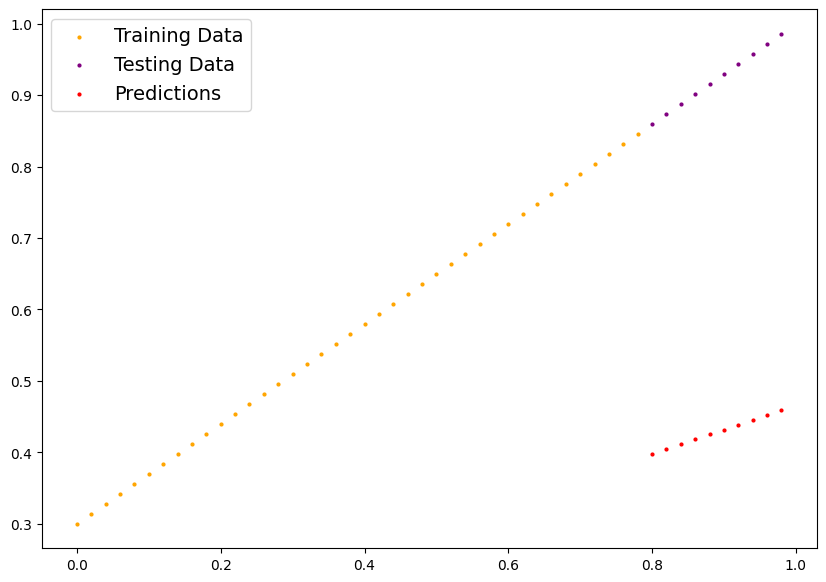

In [65]:
# initial predictions on plot compared to actual values
plot_predictions(predictions=y_preds)

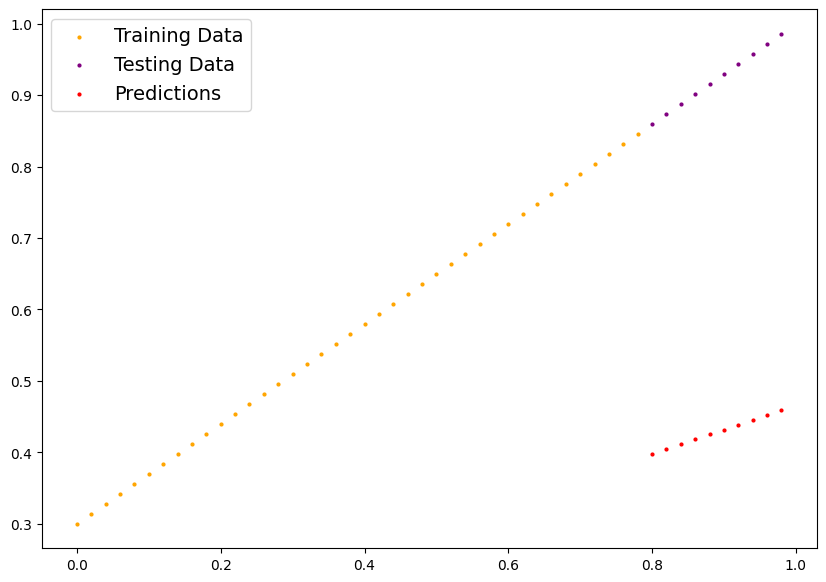

In [66]:
# new predictions after running some epochs
plot_predictions(predictions=y_preds_new)

# Writing the testing loop
### NOTE: Training and Testing loops are not needed to be written together, you can functionize them (make a function out of them)

### NOTE: This is a continuation of the previous code


In [67]:
torch.manual_seed(42)

# an EPOCH is a complete pass of training data through an algorithm
epochs = 200

#------TRACKING DIFFERENT VALUES
count_epoch = []
values_loss = []
values_test_loss = []

#-------TRAINING

# Step 0: We loop through the data
for epoch in range(epochs):
  # MODEL DOT TRAIN
  first_model.train() # set model into train mode, sets param that req gradients to req gradients

# Step 1: Forward pass, passing data (X_train) to get y_pred
  y_pred = first_model(X_train)

# Step 2: Loss calculation
  loss_calc = fn_loss(y_pred, y_train) # input first, target second
  # we calculate differences between training and ideal predictions
  #print(f"Loss: {loss_calc}")
# Step 3: Optimizer zero grad
  fn_optim.zero_grad() #the optimizer changes will accumulate by default, through the loop
  # this is why we zero grad

# Step 4: Perform backpropagation on the loss with respect to model param
  loss_calc.backward()

# Step 5: Optimizer step (gradient descent), this normally occurs after backpropagation
  fn_optim.step()
  #updates our model parameters to try to get them as close as the og ones
  # if this occurs, the LOSS should be close to 0

#-------TESTING

# MODEL DOT EVAL
  first_model.eval() # turns off gradient tracking

# WITH TORCH INFERENCE MODE
  with torch.inference_mode(): #turns off gradient tracking &/or  more for testing
# DO THE FORWARD PASS
    test_pred = first_model(X_test)
# ? CALCULATE THE LOSS
    test_loss = fn_loss(test_pred, y_test)

    # PRINT OUT WHATS HAPPENING every 10 epochs
  if epoch % 10 == 0:
    #appending values every epoch for traking values
    count_epoch.append(epoch)
    values_loss.append(loss_calc)
    values_test_loss.append(test_loss)

    #print
    print(f"Epoch: {epoch} | Loss: {loss_calc}) | Test loss:{test_loss}")
# PRINT OUT WHATS HAAAPPENING with w&b
    print(first_model.state_dict())

#compare to original w&b vals (this isnt the case in a real problem)
weight, bias

  # NOTE THIS IS A CONTINUATION OF THE PREVIOUS CODE: IN ORDER TO RUN WITH NO ISSUES
  # COMMENT OUT THE PREVIOUS EPOCH ITERATION OF THE FIRST MODEL AND RERUN ALL CELLS


  # IN ORDER TO SEE SOME ACTION, after training model:
  # print the loss value, in this case loss_calc
  # watch how it should be going down after eache poch, at least in this case

Epoch: 0 | Loss: 0.31288138031959534) | Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637) | Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134) | Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906) | Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802) | Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876) | Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351) | Test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

(0.7, 0.3)

In [68]:
# RESULTS AFTER 100 EPOCHS!
# Test Loss : 0.06473556160926819
# OrderedDict([('weights', tensor([0.5629])), ('bias', tensor([0.3573]))]

In [69]:
# doing predictions and comparing the predictions to the actual values
with torch.inference_mode():
  y_preds_new = first_model(X_test)

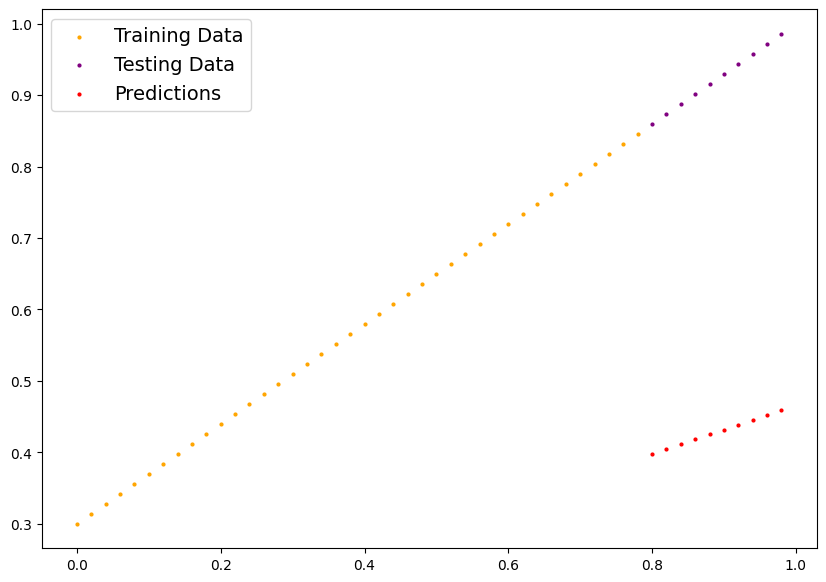

In [70]:
plot_predictions(predictions=y_preds)

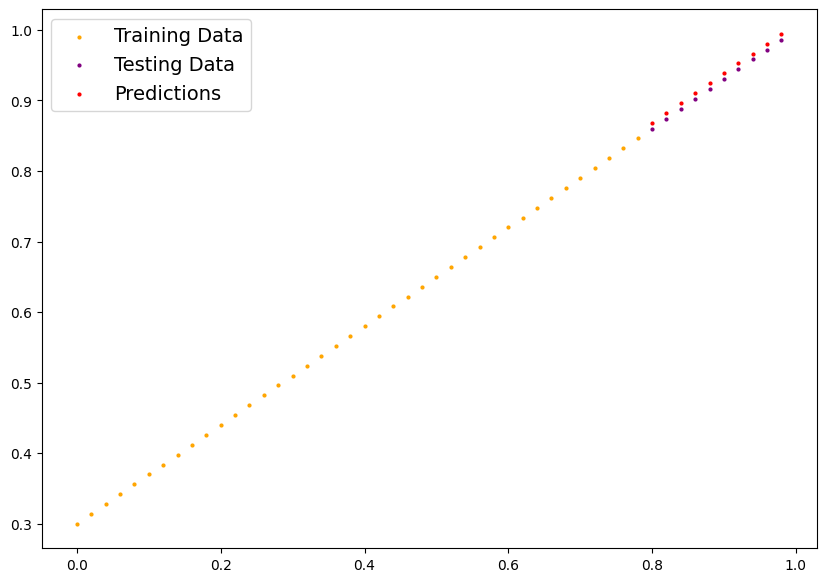

In [71]:
plot_predictions(predictions=y_preds_new)

In [72]:
import numpy as np

'''
RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
'''

# our loss values are still on pytorch, and they cant be because
# matplot works with numpy, so we convert to numpy
# as seen in pytorch fundamentals

torch.tensor(values_loss).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

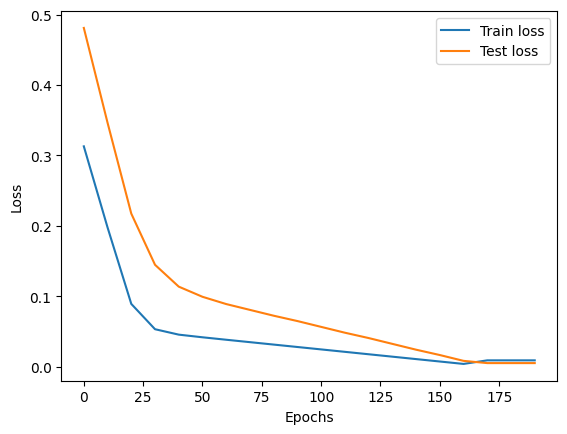

In [73]:
# PLOTTING THE LOSS CURVES AFTER CONVERTING
plt.plot(count_epoch, torch.tensor(values_loss).numpy() , label="Train loss")
plt.plot(count_epoch, values_test_loss, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving a model (Pytorch)

Three main methods to save & load models in Pytorch

- torch.save() -  saves Pytorch object in Python's pickle format
- torch.load() - loads Pytorch object
- torch.nn.Module.load_state_dict() - load a model's saved state dictionary


In [74]:
# Example of load_state_dict()
first_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [75]:
# Saving our Pytorch model
from pathlib import Path

#1. Create models directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

#2. Create model save path
model_name = 'first_pytorch_model_0.pth' #pth / pt file extension for a pytorch file
model_save_path = model_path / model_name

model_save_path # models folder gets created

#3. Save the model state dict.
print("Saving model to:", {model_save_path})
torch.save(obj=first_model.state_dict(), f=model_save_path)

Saving model to: {PosixPath('models/first_pytorch_model_0.pth')}


In [76]:
# listing the models
!ls -1 models

first_pytorch_model_0.pth


In [77]:
# Daniel said to do this on extracurriculum, maybe a different notebook?

# torch.load(f=model_save_path)

In [78]:
# Load in a saved state_dict
# we instantiate a new instance of our model class
first_loaded_model = LinearRegressionModel()

# Load saved state_dict of first_model
#this updates new instance with updated parameters
first_loaded_model.load_state_dict(torch.load(f=model_save_path))

<ipython-input-78-e0b0e03f22e1>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_loaded_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [79]:
# Results before using load_state_dict
# first_loaded_model.state_dict(torch.load(f=model_save_path))
# OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

<ipython-input-79-4c02d06ec732>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_loaded_model.state_dict(torch.load(f=model_save_path))
<ipython-input-79-4c02d06ec732>

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [80]:
# after using load state dict, we should have the same exact values as above (you did)
# first_loaded_model.state_dict()
# results after load state dict:
# OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [81]:
# Making predictions with loaded model
first_loaded_model.eval()
with torch.inference_mode():
  preds_loaded_model = first_loaded_model(X_test)

#PREDICTIONS FORM LOADED MODEL:
print("Predictions from loaded model:\n")
preds_loaded_model

Predictions from loaded model:



tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [82]:
# Comparing precitions between original and loaded model
y_preds == preds_loaded_model
#BUT WHY IS IT FALSE?

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [83]:
# Predictions on original model TO COMPARE TO PREVIOUS LOADED MODEL
first_model.eval()
with torch.inference_mode():
  y_preds = first_model(X_test)

print("Original predictions after predicting loaded model:")
y_preds

Original predictions after predicting loaded model:


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

TIME STAMP 7:37:00 HOURS IN